In [1]:
#
#  GPGN470: Remote Sensing, Homework 5: MODIS, Spring 2021
#  M. Siegfried, siegfried@mines.edu
#

import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
#
# Problem (1)
#

# Load all seven bands
f = open('modis1.dat','r'); b1=np.genfromtxt(f); f.close()
f = open('modis2.dat','r'); b2=np.genfromtxt(f); f.close()
f = open('modis3.dat','r'); b3=np.genfromtxt(f); f.close()
f = open('modis4.dat','r'); b4=np.genfromtxt(f); f.close()
f = open('modis5.dat','r'); b5=np.genfromtxt(f); f.close()
f = open('modis6.dat','r'); b6=np.genfromtxt(f); f.close()
f = open('modis7.dat','r'); b7=np.genfromtxt(f); f.close()

# turn it into an MxNx7 matrix just for compactness
modis=np.stack((b1,b2,b3,b4,b5,b6,b7),axis=2)


In [3]:
#
# Look at each band separately and as an rgb image
# See HW4's Landsat plotting code to help you get started here
#

In [4]:
#
# Problem (2) Create a training set
#
# Identify the location (column,row) of "training pixels" and assign them a "group number":
# For the sake of time, we're just going to identify two training pixels per group
#

<IPython.core.display.Javascript object>


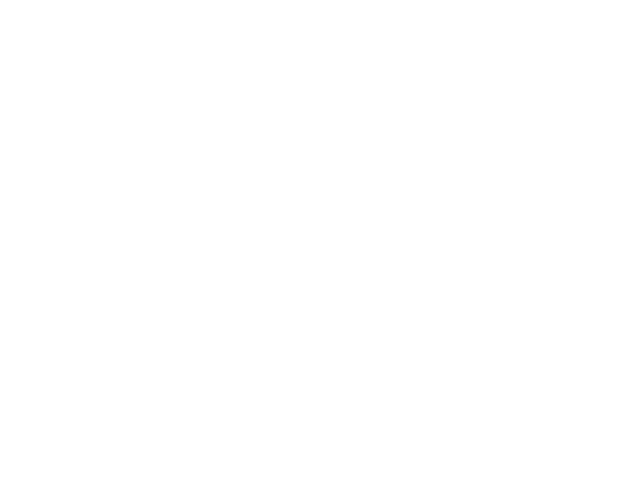

In [5]:
######## Here's some code to make an interactive figure where you click it
######## and it tells you the x,y pixel locations. It also saves it to a matrix
######## called coords, so then you just need to copy that and add group numbers!

# this turns it into an interactive plot.
# use inline instead of notebook to go back to non-interactive
%matplotlib notebook

coords=np.array([]) # initialize an empty array for the coordinates to go into

# define what happens when there's a click event
def onclick(event):
    global ix, iy, coords, text
    ix, iy = int(round(event.xdata)), int(round(event.ydata)) # store x,y location
    tx="x = {}, y = {}".format(ix, iy) # string to print on the figure
    
    # if this is your first click, initialize the coords array and the text on figure
    # otherwise, just append the new coordinates and replace the text on the figure
    if coords.shape[0]==0:
        coords=np.array([ix,iy])
        text=ax.text(0,0,tx,va="bottom",ha="left")
    else:
        coords=np.vstack([coords,[ix,iy]])
        text.set_text(tx)
    return coords


# set up a figure that has a listener for clicking the mouse.
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(modis[:,:,[0,3,2]]/255)
fig.canvas.mpl_connect('button_press_event',onclick)
plt.show()

#########
#########
#########

In [6]:
%matplotlib inline

# Each line of tpix should have three numbers in the following format:
#      col,row,group



# Make a list of class names that you'll use for your colorbar labels later




#
# From these pixels, make a training set consisting of each training pixel's band values
# "train" should have the same number of rows as the number of training pixels, and the
# same number of columns as number of bands (in this case 7).
#


In [7]:
#
# PROBLEM (3) PREPARE DATA FOR CLASSIFICATION
# Reshape image into one long vector of pixel band values.
# Convert from uint8 to float for classification.
#
nx=modis.shape[0]
ny=modis.shape[1]
nz=modis.shape[2]




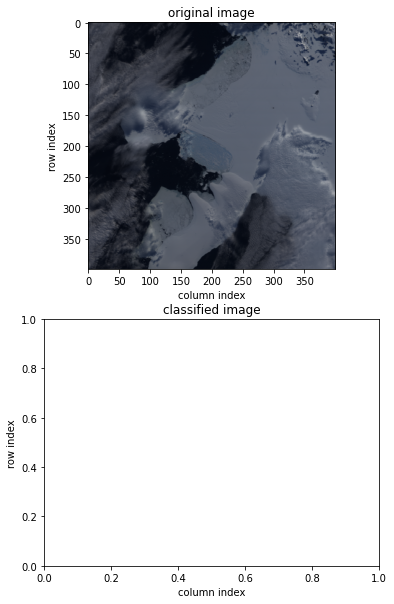

In [8]:
#
# Problem (4) CLASSIFY AND VISUAL THE IMAGE
#

# Classify the image using the LinearDiscriminantAnalysis() function, and
# reshape the classified pixels back into the right shape


#
# Now visualize the image.
#
# You could do this with any colormap, or you can make your own with RGB values
# for each Group Number that make sense to you. Feel free to use the map below
# or make your own.
colors = np.array([[0,0.74902,0.74902],            # Group 1: Melty Ice Shelf
                   [0.95294, 0.87059, 0.73333],    # Group 2: Land Ice
                   [0.72941, 0.83137, 0.95686],    # Group 3: Sea Ice
                   [1,       0.96863, 0.92157],    # Group 4: Clouds
                   [0.078431,0.16863, 0.549025]])  # Group 5: Open Ocean


# Make a colormap from the list of colors


# plot the results as a two panel subplot (image on top, classified image on bottom)
fig, (ax1,ax2) = plt.subplots(2,1) # set up your axes
fig.set_figheight(10) # make the figure bigger

# plot the original picture on top
ax1.imshow(modis[:,:,[0,3,2]]/255)
ax1.set_ylabel('row index')
ax1.set_xlabel('column index')
ax1.set_title('original image')

# plot the classified picture on bottom using the colormap you just made
ax2.set_title('classified image')
ax2.set_ylabel('row index')
ax2.set_xlabel('column index')

# show the classification colorbar with labels for classes




plt.show()

In [9]:
#
# Bonus #1: (Optional) Look at the misfit
#

#
# Bonus #2: (Optional) Redo the classification with a different classification algorithm
#                      and see how the misfits compares
#